# Setup

In [20]:
from classes import *



mod = Model(np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]]), np.array([1, 2, 3]), 15)
adamOpt = Adam(mod.copy(), h=0.1, tol=1e-5, maxiter=1e4)
sgdAdamOpt = SGD(adamOpt, 10)

# Training

In [2]:
batchFrom = 0
batchTo = 20
dataPointsFrom = 0
dataPointsTo = 1500
train(sgdAdamOpt, batchFrom, batchTo, dataPointsFrom, dataPointsTo)

Training on batch 0-20 with 1500 datapoints.
Inputs: Q, output: V, iterations: 10000.0, Layers: 15
Batch	J(θ)
0	0.00288965123787851
1	0.005635367871321423
2	0.0031452814022990797
3	0.002921542177665444
4	0.008893259415533669
5	0.0013828366095690445
6	0.011838053736460545
7	0.0014020955984928554
8	0.001258308292018806
9	0.0008664388744149366
10	0.002592996328023009
11	0.004078314657830677
12	0.0012099116625697076
Error occured on batch 13:
underflow encountered in multiply
14	0.011925639239543245
Error occured on batch 15:
underflow encountered in multiply
16	0.00727663878247921
17	0.012986833851024704
18	0.008283941609733732
Error occured on batch 19:
underflow encountered in multiply
20	0.003200329014847781
Training time: 0:15:37.974624


# Testing
We have chosen to train all optimizers on the first 21 batches and then test them on batch 30

In [13]:
testBatch = generate_data(30)
Y0test = np.array(testBatch['Q'][:, dataPointsFrom:dataPointsTo])
print(Y0test.shape)
Ctest = np.array(testBatch['V'][dataPointsFrom:dataPointsTo])
print(Ctest.shape)
ttest = testBatch['t'][dataPointsFrom:dataPointsTo]

(3, 1500)
(1500,)


In [18]:
def testOnNew(Y, C, t, m):
    Z = Y.copy()
    θ = m.M.θ

    for k in range(m.M.K):
        Z = (Z + m.M.h * σ(θ['W'][k] @ Z + θ['b'][k]))
    print(Z.shape)
    Υ = η(Z.T @ θ['w'] + θ['μ']).T[0]
    print(Υ.shape)

    Jθ = 0.5*np.linalg.norm(Υ - scale(C))**2

    plt.title(r'Trained on new input, $J(\theta) = {}\%$'.format(round(Jθ, 4)))
    plt.plot(t, scaleBack(Υ, C), label=r'$\tilde{F}(y)$')
    plt.plot(t, C, ls='--')
    plt.legend()
    plt.show()

(3, 1500)
(1500,)


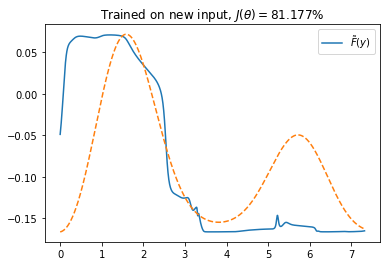

In [19]:
testOnNew(Y0test, Ctest, ttest, sgdAdamOpt)